In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import librosa

In [2]:
import WavetableGenerator

wtgen = WavetableGenerator.WavetableGenerator()

wt = wtgen.gen_wavetable(preset='default')

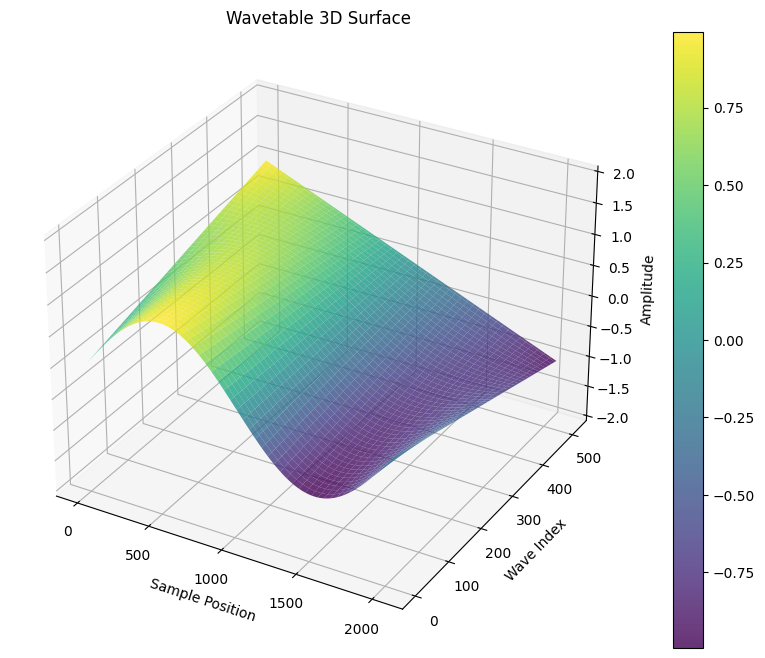

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_wavetable_3d(wavetable):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create coordinate grids
    X, Y = np.meshgrid(np.arange(wavetable.shape[1]), np.arange(wavetable.shape[0]))
    Z = wavetable
    ax.set_zlim(np.min(Z)*2, np.max(Z)*2)  # Set z-axis limits
    
    # Plot surface
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    ax.set_xlabel('Sample Position')
    ax.set_ylabel('Wave Index')
    ax.set_zlabel('Amplitude')
    ax.set_title('Wavetable 3D Surface')
    
    plt.colorbar(surf)
    plt.show()

plot_wavetable_3d(wt)



Wavetable shape: (512, 2048)
Wavetable range: -1.000 to 1.000
Any NaN/Inf in wavetable: False
First wave range: -1.000 to 1.000
0.0
-0.003067956762966544


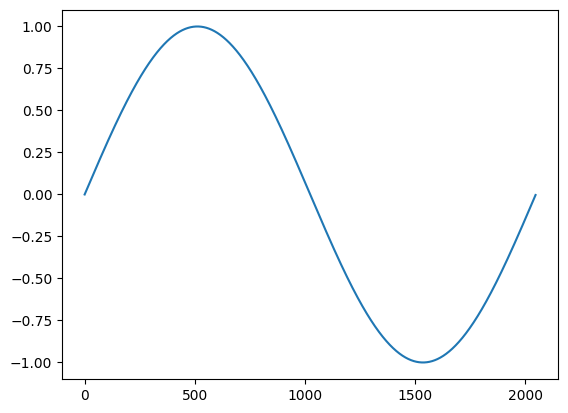

In [4]:
def check_wavetable(wt):
    
    print(f"Wavetable shape: {wt.shape}")
    print(f"Wavetable range: {np.min(wt):.3f} to {np.max(wt):.3f}")
    print(f"Any NaN/Inf in wavetable: {np.any(np.isnan(wt)) or np.any(np.isinf(wt))}")
    
    # Check first wave (should be sine-like)
    first_wave = wt[0, :]
    print(f"First wave range: {np.min(first_wave):.3f} to {np.max(first_wave):.3f}")
    
    return wt

check_wavetable(wt)
first = wt[0, :]

plt.plot(first)
print(first[0])
print(first[-1])

imports done
MiniSynth(sampling_rate=44100, duration=10.0, base_freq=[440. 440. 440. ... 440. 440. 440.], amp=[1. 1. 1. ... 1. 1. 1.], mod_freq_ratio=[1. 1. 1. ... 1. 1. 1.], mod_shape=[0. 0. 0. ... 0. 0. 0.], carr_shape=[0. 0. 0. ... 0. 0. 0.], fm_amount=[0. 0. 0. ... 0. 0. 0.])
mod_audio shape: (441000,), samples: 441000


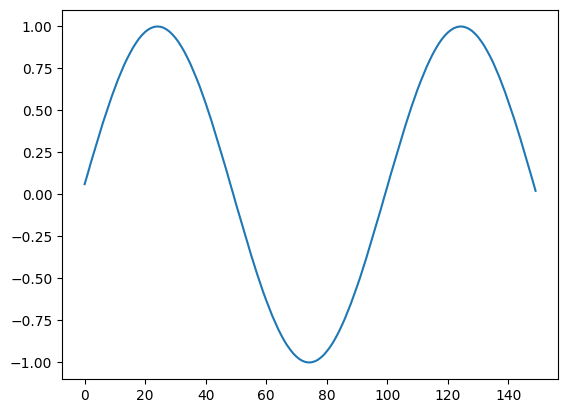

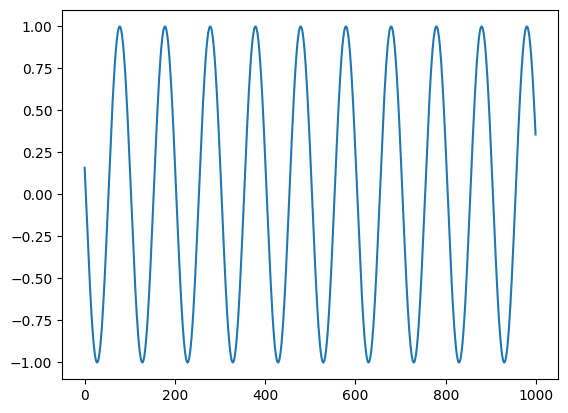

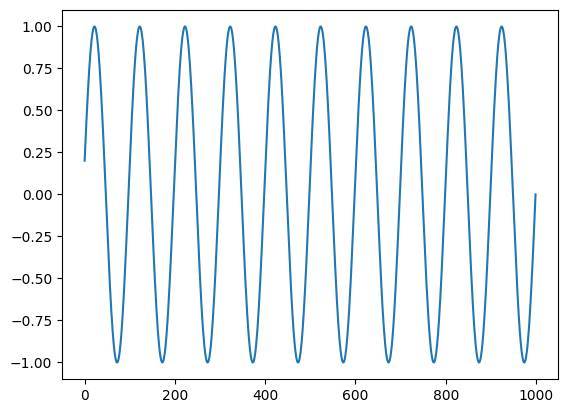

In [5]:
import MiniSynth

synth = MiniSynth.MiniSynth(wavetable=wt)
print(synth)



audio = synth.render()

plt.plot(audio[:150])
plt.show()

plt.plot(audio[200000:201000])
plt.show()

plt.plot(audio[-1000:])
plt.show()

display(Audio(audio, rate=44100, normalize=True))

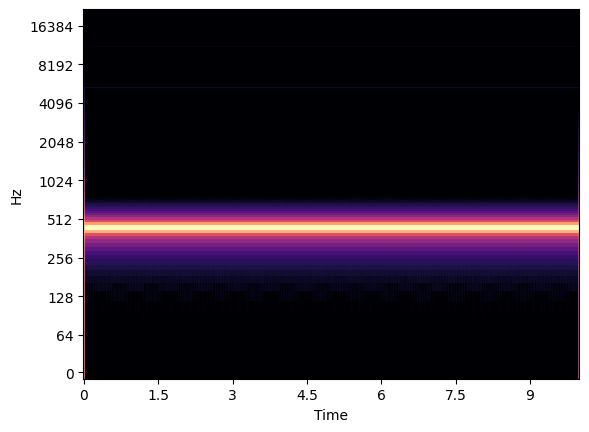

In [6]:
hop_length = 1024

D = librosa.amplitude_to_db(np.abs(librosa.stft(audio, hop_length=hop_length)),

                            ref=np.max)

librosa.display.specshow(D, y_axis='log', sr=44100, hop_length=hop_length,

                         x_axis='time')

0.33006370142461655 0.16178623607720113


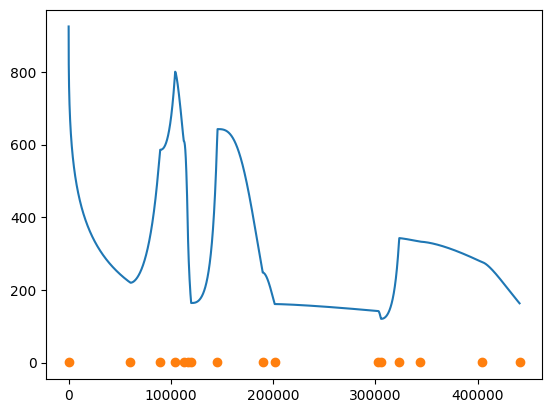

In [7]:
import ModGenerator
import matplotlib.pyplot as plt

modgen = ModGenerator.ModGenerator()

points_x, points_y = modgen.init_points_random().get_plot_points()

line = modgen.render()
print(np.mean(line), np.std(line))

line = modgen.render(min=100, max=2000, scale=ModGenerator.ModScale.LOGARITHMIC)

plt.plot(line, label='Modulation Line')
plt.plot(points_x, points_y, 'o')

mod_audio shape: (441000,), samples: 441000


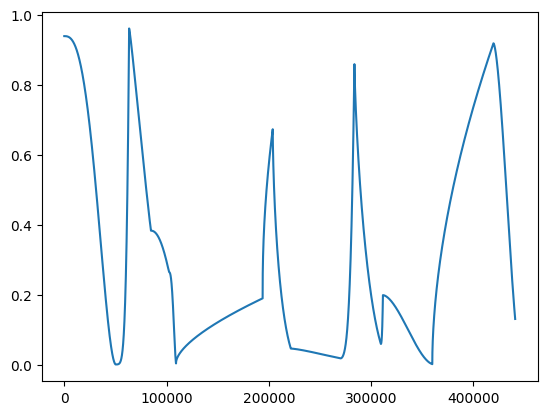

In [8]:
modgen.init_points_random()
shape = modgen.render(scale=ModGenerator.ModScale.LOGARITHMIC)

plt.plot(shape, label='Modulation Shape')

synth.set_base_freq(line)
synth.set_carr_shape(shape)
audio = synth.render()

display(Audio(audio, rate=synth.sr))

In [9]:
first_wave = wt[0, :]
t = np.linspace(0, 1, len(first_wave))
pure_sine = np.sin(2 * np.pi * t)
print(f"First wave vs pure sine max diff: {np.max(np.abs(first_wave - pure_sine)):.6f}")

First wave vs pure sine max diff: 0.003068


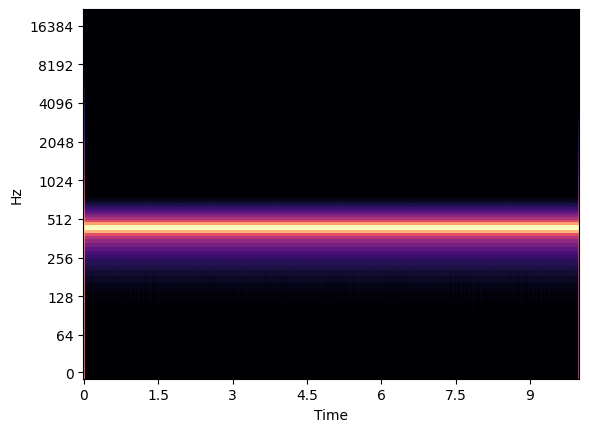

In [10]:
def test_simple_osc():
    sr = 44100
    duration = 10.0
    samples = int(sr * duration)
    
    # Simple phase accumulation
    phase = np.zeros(samples)
    freq = 440.0
    current_phase = 0.0
    
    for i in range(samples):
        current_phase += freq / sr
        phase[i] = current_phase % 1.0
    
    # Direct sine generation
    output = np.sin(2 * np.pi * phase)
    
    return output

simple_audio = test_simple_osc()

display(Audio(simple_audio, rate=44100, normalize=True))

D = librosa.amplitude_to_db(np.abs(librosa.stft(simple_audio, hop_length=hop_length)),

                            ref=np.max)

librosa.display.specshow(D, y_axis='log', sr=44100, hop_length=hop_length,

                         x_axis='time')
